<a href="https://colab.research.google.com/github/Makushiin/CS559-Projects/blob/main/CS559A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

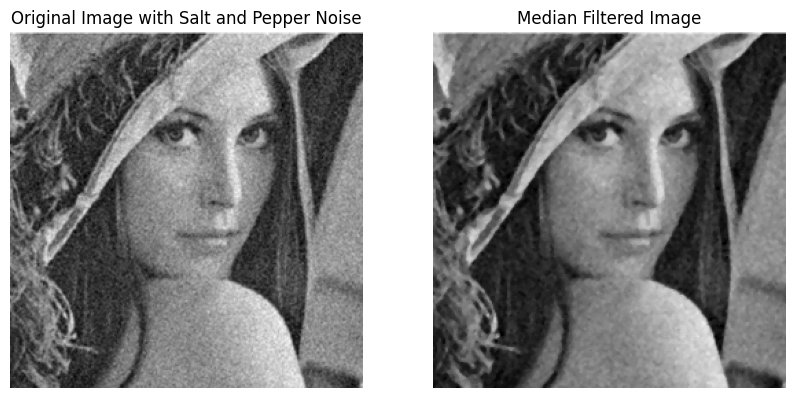

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image with salt and pepper noise
image = cv2.imread('q4.png', 0)  # 0 to read the image in grayscale

# Apply a median filter
# The kernel size can be adjusted to be more or less aggressive.
# A 3x3 kernel is common, but you might need a larger kernel if the noise is heavy.
median_filtered_image = cv2.medianBlur(image, 3)

# Display images
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image with Salt and Pepper Noise')
plt.axis('off')

# Median Filtered Image
plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

# If you want to save the images:
# cv2.imwrite('original_image.png', image)
# cv2.imwrite('median_filtered_image.png', median_filtered_image)

plt.show()


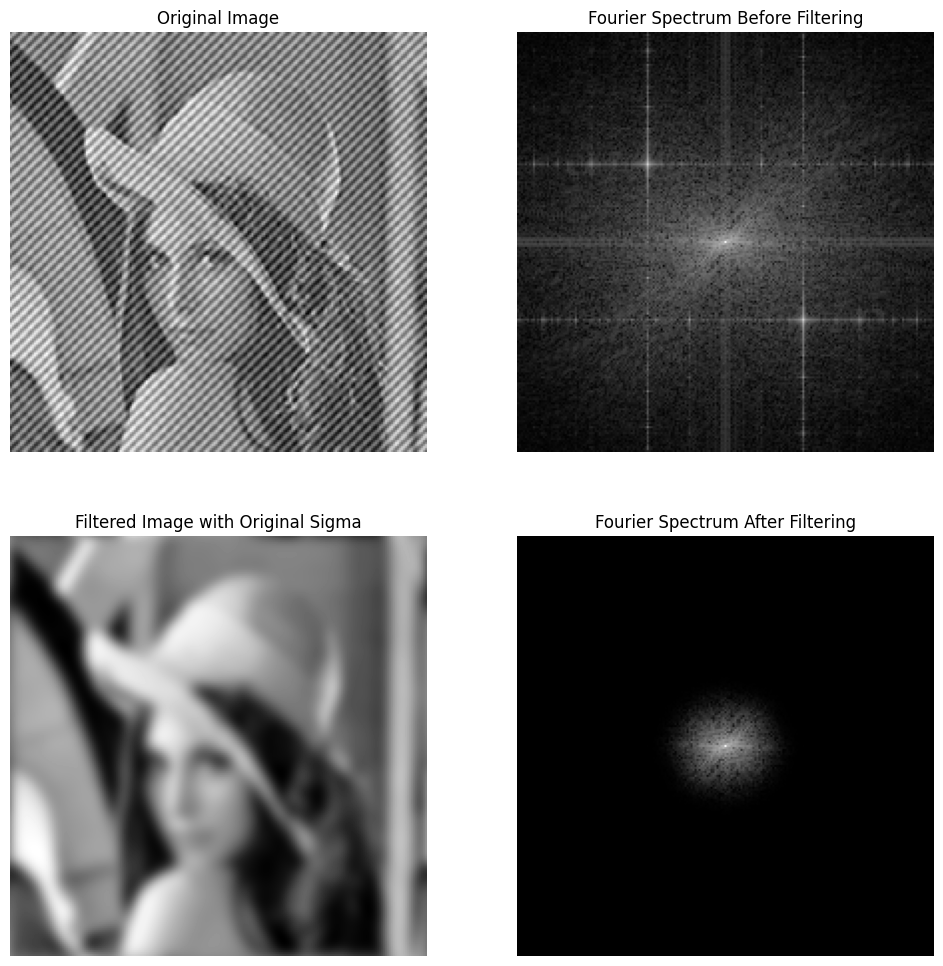

In [ ]:

from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def apply_original_gaussian_star_filter(image, sigma=10):
    # Transform the image to frequency domain and shift the zero-frequency component to the center
    f_transform = fftpack.fftshift(fftpack.fft2(image))

    # Generate the Fourier spectrum before filtering
    magnitude_spectrum_before = 20 * np.log(np.abs(f_transform) + 1)  # Added 1 inside the log to prevent log(0)

    # Create a Gaussian filter mask
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    x = np.linspace(-center_col, center_col, cols)
    y = np.linspace(-center_row, center_row, rows)
    X, Y = np.meshgrid(x, y)
    d = np.sqrt(X**2 + Y**2)
    gaussian_mask = np.exp(-(d**2) / (2 * (sigma**2)))

    # Apply the Gaussian mask to the frequency domain image
    f_transform_filtered = f_transform * gaussian_mask

    # Generate the Fourier spectrum after filtering
    magnitude_spectrum_after = 20 * np.log(np.abs(f_transform_filtered) + 1)  # Added 1 inside the log to prevent log(0)

    # Transform back to the spatial domain
    image_filtered = np.abs(fftpack.ifft2(fftpack.ifftshift(f_transform_filtered)))

    return image_filtered, magnitude_spectrum_before, magnitude_spectrum_after

# Load the image
image_path = 'q3.png'  # Placeholder for the image path
image = io.imread(image_path, as_gray=True)

# Apply the filter with the original sigma to the image
filtered_image_original, spectrum_before, spectrum_after = apply_original_gaussian_star_filter(image)

# Display the original image, Fourier spectrum before and after filtering, and the filtered image
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Fourier spectrum before filtering
axs[0, 1].imshow(spectrum_before, cmap='gray')
axs[0, 1].set_title('Fourier Spectrum Before Filtering')
axs[0, 1].axis('off')

# Filtered image
axs[1, 0].imshow(filtered_image_original, cmap='gray')
axs[1, 0].set_title('Filtered Image with Original Sigma')
axs[1, 0].axis('off')

# Fourier spectrum after filtering
axs[1, 1].imshow(spectrum_after, cmap='gray')
axs[1, 1].set_title('Fourier Spectrum After Filtering')
axs[1, 1].axis('off')

# Save the output
plt.savefig('spectrum_before_after.png')
plt.show()


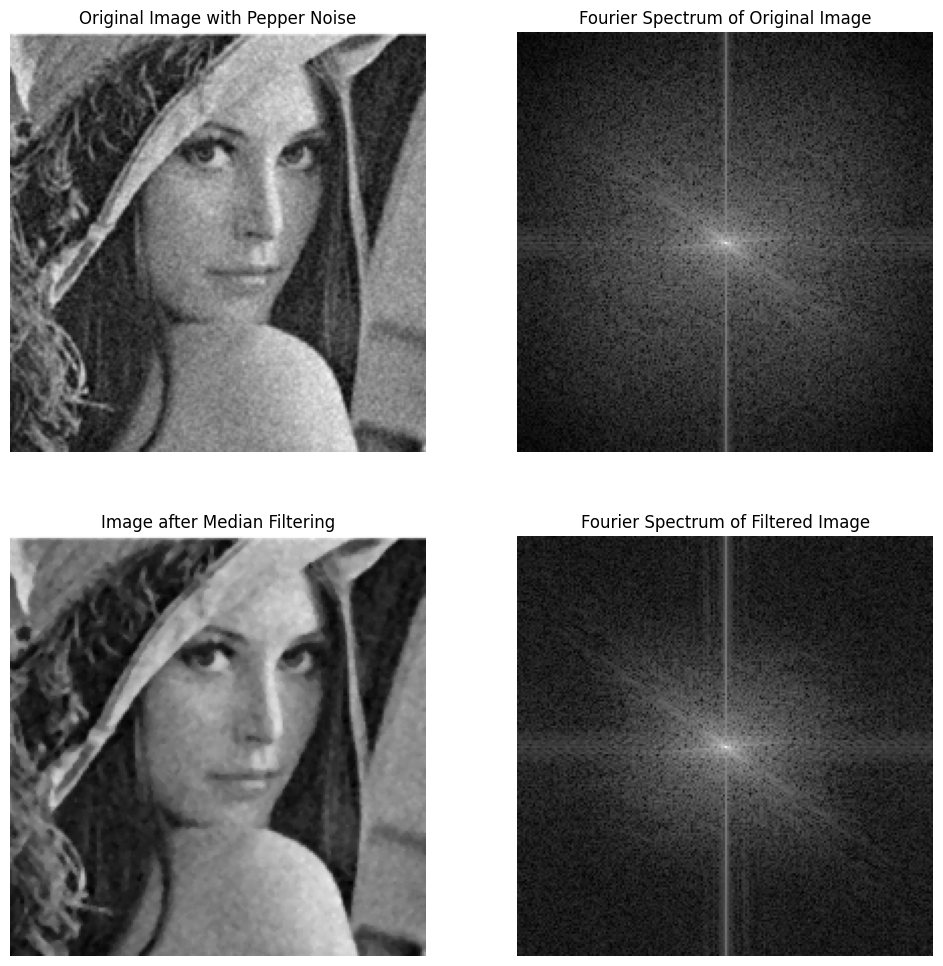

In [ ]:

from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

def compute_fourier_spectrum(image):
    # Compute the FFT and shift the zero frequency component to the center
    f_transform = fftpack.fftshift(fftpack.fft2(image))
    # Compute the magnitude spectrum and use logarithmic scaling for better visibility
    magnitude_spectrum = 20 * np.log(np.abs(f_transform) + 1)  # +1 to avoid log(0)
    return magnitude_spectrum

def apply_median_filter(image):
    # Apply a median filter to remove 'salt-and-pepper' noise
    return filters.median(image)

# Load the image with pepper noise
image_path_pepper = 'q4.png'  # Placeholder for the image path
image_pepper = io.imread(image_path_pepper, as_gray=True)

# Apply the median filter to the image
filtered_image_pepper = apply_median_filter(image_pepper)

# Compute the Fourier spectrum for the original and filtered images
spectrum_pepper_original = compute_fourier_spectrum(image_pepper)
spectrum_pepper_filtered = compute_fourier_spectrum(filtered_image_pepper)

# Display the images and their Fourier spectra
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original image with pepper noise
axs[0, 0].imshow(image_pepper, cmap='gray')
axs[0, 0].set_title('Original Image with Pepper Noise')
axs[0, 0].axis('off')

# Fourier spectrum of the original image
axs[0, 1].imshow(spectrum_pepper_original, cmap='gray')
axs[0, 1].set_title('Fourier Spectrum of Original Image')
axs[0, 1].axis('off')

# Filtered image
axs[1, 0].imshow(filtered_image_pepper, cmap='gray')
axs[1, 0].set_title('Image after Median Filtering')
axs[1, 0].axis('off')

# Fourier spectrum of the filtered image
axs[1, 1].imshow(spectrum_pepper_filtered, cmap='gray')
axs[1, 1].set_title('Fourier Spectrum of Filtered Image')
axs[1, 1].axis('off')

# Save the output
plt.savefig('spectrum_pepper_before_after.png')
plt.show()
